### Zadanie: baza filmów
Do wykonania zadań niezbędne będzie pobranie bazy filmów oraz bazy gatunków:
- Baza filmów
- Baza gatunków
1. Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.
2. Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi. Przykład wykresu widoczny poniżej:
3. Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.
4. Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?
5. Filmy, którego gatunku trwają średnio najdłużej (runtime)?
6. Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

In [2]:
import datetime as dt
import pandas as pd
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
import datetime as dt

In [3]:
dff = pd.read_csv('tmdb_movies.csv')
dff[:2]

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0


In [4]:
dfg = pd.read_csv('tmdb_genres.csv')
dfg[:2]

,Unnamed: 0,genres
0,28.0,Action
1,12.0,Adventure


##### 1. Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [5]:
q3 = dff['vote_count'].count()*3/4
q3 = math.ceil(q3)
q3

3603

In [6]:
dff_q = dff[dff['vote_count']>q3]
dff_q.sort_values(by='vote_average', ascending=False, inplace=True)
dff_q = dff_q['title']
dff_q = dff_q[:10]
dff_q.index
def dffq(dff_q):
    list=[]
    for i in dff_q:
        list.append(i)
    print(f'Lista 10 najwyżej ocenianych filmów: {list}')
dffq(dff_q)

Lista 10 najwyżej ocenianych filmów: ['The Shawshank Redemption', 'The Godfather', 'Spirited Away', 'Whiplash', 'Pulp Fiction', 'Fight Club', "Schindler's List", 'Forrest Gump', 'The Green Mile', 'The Dark Knight']


C:\Users\magda\AppData\Local\Temp\ipykernel_15796\246126905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_q.sort_values(by='vote_average', ascending=False, inplace=True)
C:\Users\magda\AppData\Local\Temp\ipykernel_15796\246126905.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  dff_q = dff_q[:10]


##### 2. Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi. Przykład wykresu widoczny poniżej:

In [7]:
dff['release_date'] = pd.to_datetime(dff['release_date'])
dff_gropup = dff[(dff['release_date']>pd.to_datetime('2009-12-31'))&(dff['release_date']<pd.to_datetime('2017-01-01'))]
dff_gropup = dff_gropup.groupby(pd.Grouper(key='release_date', freq='Y')).agg({'revenue':'mean','budget':'mean'})
dff_gropup.reset_index(inplace=True)
dff_gropup['release_date']=pd.DatetimeIndex(dff_gropup['release_date']).year
dff_gropup

,release_date,revenue,budget
0,2010,9.043811e+07,3.449541e+07
1,2011,9.200413e+07,3.477232e+07
2,2012,1.160659e+08,3.492203e+07
3,2013,1.013485e+08,3.552329e+07
4,2014,1.013466e+08,3.095989e+07
5,2015,1.054399e+08,3.113216e+07
6,2016,1.390496e+08,4.570327e+07


Text(0.5, 1.0, 'Średni przychód i budżet filmuw latach 2010-2016')

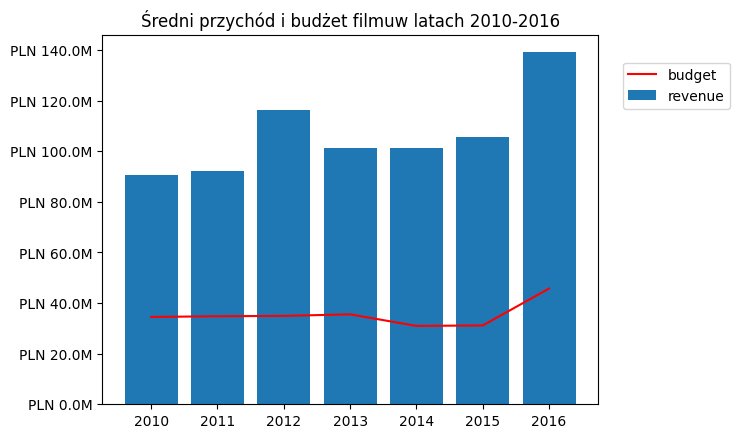

In [8]:
def milion(a, pos):
    return 'PLN {:2.1f}M'.format(a*1e-6)

fig, axes = plt.subplots()
x=dff_gropup['release_date']
y1=dff_gropup['revenue']
y2=dff_gropup['budget']
formatter=plt.FuncFormatter(milion)
axes.yaxis.set_major_formatter(formatter)
axes.yaxis.set_major_locator(plt.MultipleLocator(20e6))
axes.bar(x,y1, label='revenue')
axes.plot(x,y2, label='budget', color='red')
axes.legend(loc=(1.05,0.8))
axes.set_title('Średni przychód i budżet filmuw latach 2010-2016')

##### 3. Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [9]:
dfg.rename(columns={'Unnamed: 0':'genre_id'}, inplace=True)
dff = pd.merge(dff,dfg,how='outer', on='genre_id')
dff[:2]

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,Action
1,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,Action


##### 4. Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [10]:
dff_genres = dff
dff_genres=dff_genres.groupby('genres').agg({'id':'count'}).sort_values(by='id', ascending=False)
dff_genres.reset_index(inplace=True)
print(f'"{dff_genres.iloc[0,0]}" to gatunek filmu, który pojawia się w bazie najczęściej.')
print(f'W bazie znajduje się {dff_genres.iloc[0,1]} filmów tego gatunku.')

"Drama" to gatunek filmu, który pojawia się w bazie najczęściej.
W bazie znajduje się 1207 filmów tego gatunku.


##### 5. Filmy, którego gatunku trwają średnio najdłużej (runtime)?

In [11]:
dff_time = dff
dff_time=dff_time.groupby('genres').agg({'runtime':'mean'}).sort_values(by='runtime', ascending=False)
dff_time.reset_index(inplace=True)
print(f' Filmy z gatunku "{dff_time.iloc[0,0]}" trwają średnio najdłużej.')

 Filmy z gatunku "History" trwają średnio najdłużej.


##### 5. Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

<AxesSubplot: >

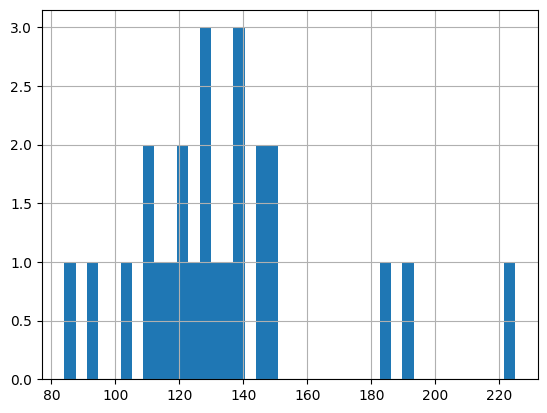

In [12]:
dfhist = dff[(dff['genres']==f'{dff_time.iloc[0,0]}')]
dfhist['runtime'].hist(bins=40)